In [9]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv(r'./train.csv')
test = pd.read_csv(r'./test.csv')

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [8]:
cols = train.columns
for col in cols:
    print(col, '\t', train[col].nunique())

id 	 595212
target 	 2
ps_ind_01 	 8
ps_ind_02_cat 	 5
ps_ind_03 	 12
ps_ind_04_cat 	 3
ps_ind_05_cat 	 8
ps_ind_06_bin 	 2
ps_ind_07_bin 	 2
ps_ind_08_bin 	 2
ps_ind_09_bin 	 2
ps_ind_10_bin 	 2
ps_ind_11_bin 	 2
ps_ind_12_bin 	 2
ps_ind_13_bin 	 2
ps_ind_14 	 5
ps_ind_15 	 14
ps_ind_16_bin 	 2
ps_ind_17_bin 	 2
ps_ind_18_bin 	 2
ps_reg_01 	 10
ps_reg_02 	 19
ps_reg_03 	 5013
ps_car_01_cat 	 13
ps_car_02_cat 	 3
ps_car_03_cat 	 3
ps_car_04_cat 	 10
ps_car_05_cat 	 3
ps_car_06_cat 	 18
ps_car_07_cat 	 3
ps_car_08_cat 	 2
ps_car_09_cat 	 6
ps_car_10_cat 	 3
ps_car_11_cat 	 104
ps_car_11 	 5
ps_car_12 	 184
ps_car_13 	 70482
ps_car_14 	 850
ps_car_15 	 15
ps_calc_01 	 10
ps_calc_02 	 10
ps_calc_03 	 10
ps_calc_04 	 6
ps_calc_05 	 7
ps_calc_06 	 11
ps_calc_07 	 10
ps_calc_08 	 11
ps_calc_09 	 8
ps_calc_10 	 26
ps_calc_11 	 20
ps_calc_12 	 11
ps_calc_13 	 14
ps_calc_14 	 24
ps_calc_15_bin 	 2
ps_calc_16_bin 	 2
ps_calc_17_bin 	 2
ps_calc_18_bin 	 2
ps_calc_19_bin 	 2
ps_calc_20_bin 	 2


In [7]:
n_estimator = 10

X_train, X_test, y_train, y_test = train_test_split(train.drop(['id', 'target'], axis=1), train['target'], test_size=0.3)
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size=0.3)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd.fit(X_train, y_train)

grd_enc = OneHotEncoder(categories='auto')
grd_enc.fit(grd.apply(X_train)[:, :, 0])

# 使用OneHot编码作为特征，训练LR
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

# 使用LR进行预测
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

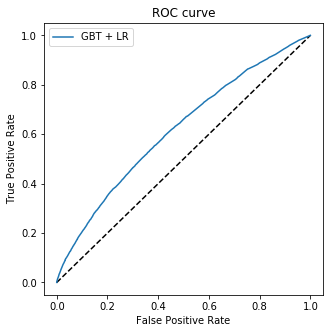

In [10]:
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()